In [1]:
from mdp.mdp import (
    MDP,
    GridMDP,
    expected_utility_of_action,
    derive_policy,
    value_iteration,
    GRID_MDP_DICT,
    HIGHWAY_MDP_DICT,
    LC_RIGHT_ACTION,
    STAY_IN_LANE_ACTION,
)

In [2]:
# From https://github.com/aimacode/aima-python
"""
The MIT License (MIT)

Copyright (c) 2016 aima-python contributors

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
"""
from collections import defaultdict
import matplotlib.pyplot as plt


def make_plot_grid_step_function(
    columns, rows, U_over_time, show=True, plot_args_dict: dict = {}
):
    """ipywidgets interactive function supports single parameter as input.
    This function creates and return such a function by taking as input
    other parameters."""

    def plot_grid_step(iteration):
        data = U_over_time[iteration]
        data = defaultdict(lambda: 0, data)
        grid = []
        for row in range(rows):
            current_row = []
            for column in range(columns):
                current_row.append(data[(column, row)])
            grid.append(current_row)
        grid.reverse()  # output like book
        grid = [[-200 if y is None else y for y in x] for x in grid]
        fig = plt.imshow(
            grid, cmap=plt.cm.bwr, interpolation="nearest", **plot_args_dict
        )

        plt.axis("off")
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)

        for col in range(len(grid)):
            for row in range(len(grid[0])):
                magic = grid[col][row]
                fig.axes.text(
                    row, col, "{0:.2f}".format(magic), va="center", ha="center"
                )
        if show:
            plt.show()

    return plot_grid_step

In [3]:
import numpy as np


def make_plot_policy_step_function(columns, rows, policy_over_time, show=True):
    def plot_grid_step(iteration):
        data = policy_over_time[iteration]
        for row in range(rows):
            for col in range(columns):
                if not (col, row) in data:
                    continue
                x = col + 0.5
                y = row + 0.5
                if data[(col, row)] is None:
                    plt.scatter([x], [y], color="black")
                    continue
                dx = data[(col, row)][0]
                dy = data[(col, row)][1]
                scaling = np.sqrt(dx ** 2.0 + dy ** 2.0) * 2.5
                dx /= scaling
                dy /= scaling
                plt.arrow(x, y, dx, dy)
        plt.axis("equal")
        plt.xlim([0, columns])
        plt.ylim([0, rows])
        if show:
            plt.show()

    return plot_grid_step

## TOY EXAMPLE

In [4]:
grid_mdp = GridMDP(**GRID_MDP_DICT)

In [5]:
computed_utility_history = value_iteration(
    mdp=grid_mdp, epsilon=0.001, max_iterations=30, return_history=True
)

In [6]:
%matplotlib inline
plot_grid_step = make_plot_grid_step_function(
    columns=4, rows=3, U_over_time=computed_utility_history
)

In [7]:
import ipywidgets
from IPython.display import display

iteration_slider = ipywidgets.IntSlider(
    min=0, max=len(computed_utility_history) - 1, step=1, value=0
)
w = ipywidgets.interactive(plot_grid_step, iteration=iteration_slider)
display(w)

interactive(children=(IntSlider(value=0, description='iteration', max=19), Output()), _dom_classes=('widget-in…

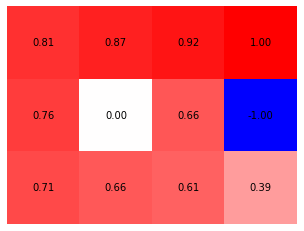

In [8]:
plot_grid_step(19)

## HIGHWAY EXAMPLE

In [9]:
if False:
    # we will change this to true later on, to see the effect
    HIGHWAY_MDP_DICT["transition_probabilities_per_action"][LC_RIGHT_ACTION] = [
        (0.4, LC_RIGHT_ACTION),
        (0.6, STAY_IN_LANE_ACTION),
    ]

In [10]:
highway_mdp = GridMDP(**HIGHWAY_MDP_DICT)

In [11]:
utility_history_highway = value_iteration(
    highway_mdp, epsilon=0.001, max_iterations=30, return_history=True
)

In [12]:
plot_grid_step_highway = make_plot_grid_step_function(
    columns=10, rows=4, U_over_time=utility_history_highway
)

In [13]:
iteration_slider = ipywidgets.IntSlider(
    min=0, max=len(utility_history_highway) - 1, step=1, value=0
)
w = ipywidgets.interactive(plot_grid_step_highway, iteration=iteration_slider)
display(w)

interactive(children=(IntSlider(value=0, description='iteration', max=10), Output()), _dom_classes=('widget-in…

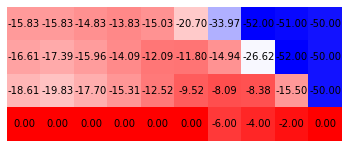

In [14]:
plot_grid_step_highway(10)

In [15]:
policy_array = [
    derive_policy(highway_mdp, utility) for utility in utility_history_highway
]

In [16]:
plot_policy_step_highway = make_plot_policy_step_function(
    columns=10, rows=4, policy_over_time=policy_array
)

In [17]:
iteration_slider = ipywidgets.IntSlider(
    min=0, max=len(utility_history_highway) - 1, step=1, value=0
)
w = ipywidgets.interactive(plot_policy_step_highway, iteration=iteration_slider)
display(w)

interactive(children=(IntSlider(value=0, description='iteration', max=10), Output()), _dom_classes=('widget-in…

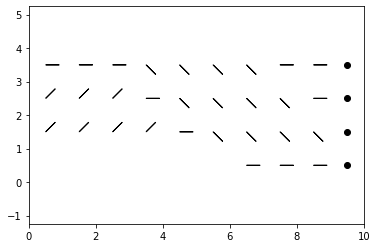

In [18]:
plot_policy_step_highway(10)